<a href="https://colab.research.google.com/github/realyou0312/Bigdata-Gisa/blob/main/JY_1_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = '/content/drive/MyDrive/빅분기 실기/예제문제/'
df = pd.read_csv(path + 'mtcars.csv',index_col=0)

## 1. mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소 최대 척도(min-max scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.

In [3]:
scaler = MinMaxScaler()
train = df['qsec'].values.reshape(-1,1)
minmax = scaler.fit_transform(train)
np.count_nonzero(minmax > 0.5)

9

In [4]:
temp = df['qsec']
minmax = (temp - temp.min(axis=0)) / (temp.max(axis=0) - temp.min(axis=0))

num = len(minmax[minmax>0.5])
num

9

## 2. 분석문제

In [5]:
y_train = pd.read_csv(path + 'y_train.csv')
X_train = pd.read_csv(path + 'X_train.csv',encoding='euc-kr')
test  = pd.read_csv(path + 'X_test.csv',encoding='euc-kr')

In [6]:
X_train

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39


In [7]:
y_train

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0
...,...,...
3495,3495,1
3496,3496,1
3497,3497,0
3498,3498,0


In [8]:
train = pd.merge(y_train,X_train) # 공통 열 묶임

In [9]:
train

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39


## Null 처리

In [10]:
train.isnull().sum()

cust_id       0
gender        0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [11]:
train[train['환불금액'].isnull()].gender.value_counts()

0    1269
1    1026
Name: gender, dtype: int64

In [12]:
#환불금액 null -> 환불금액 없다는 뜻 -> 0 대체
train['환불금액'] =train['환불금액'].fillna(0)
test['환불금액'] = test['환불금액'].fillna(0)

In [13]:
 train['주구매상품'].value_counts()

기타        595
가공식품      546
농산물       339
화장품       264
시티웨어      213
디자이너      193
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        69
일용잡화       64
모피/피혁      57
육류         57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       44
아동         40
피혁잡화       40
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
생활잡화       15
주류         14
가구         10
커리어         9
대형가전        8
란제리/내의      8
식기          7
액세서리        5
침구/수예       4
통신/컴퓨터      3
보석          3
악기          2
소형가전        2
남성 트랜디      2
Name: 주구매상품, dtype: int64

## 이상치 확인 -> 그냥해봄

In [14]:
numerical_feats = ['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기']

In [18]:
t= train.copy()

총구매액


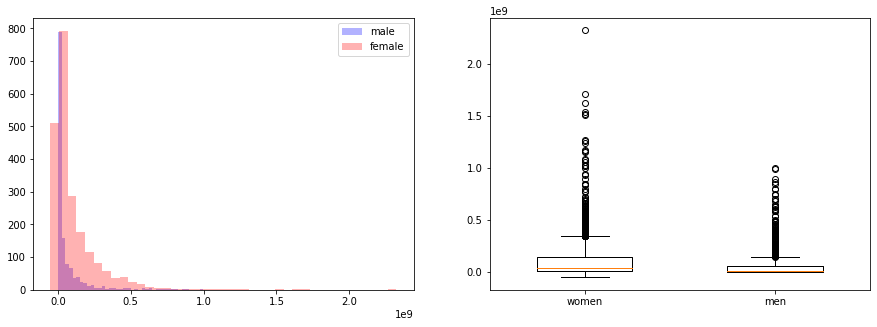

최대구매액


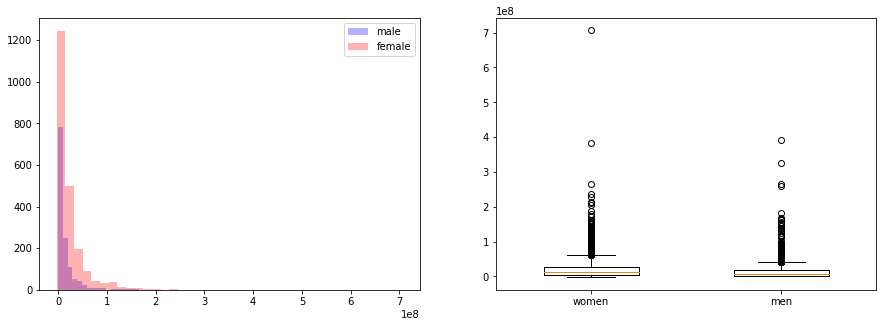

환불금액


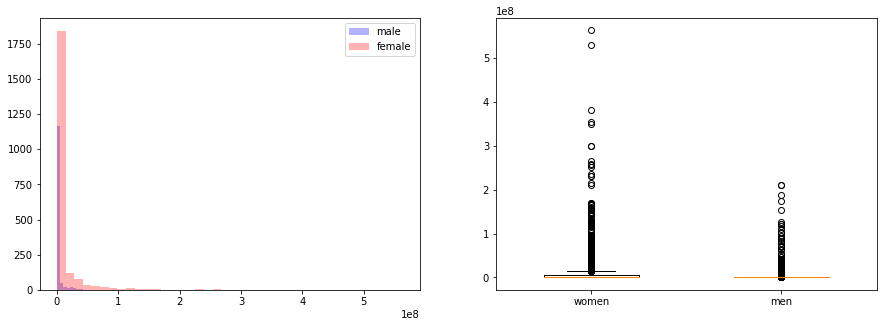

내점일수


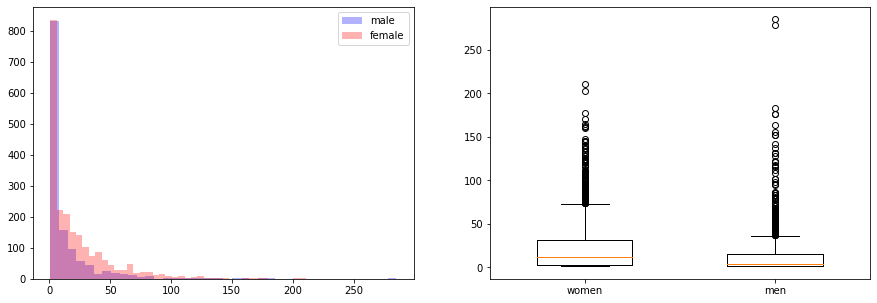

내점당구매건수


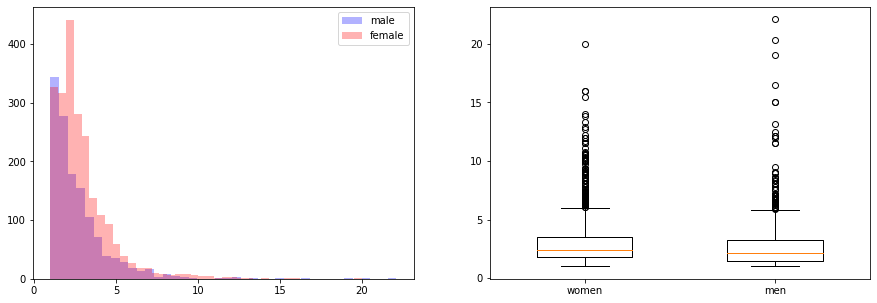

주말방문비율


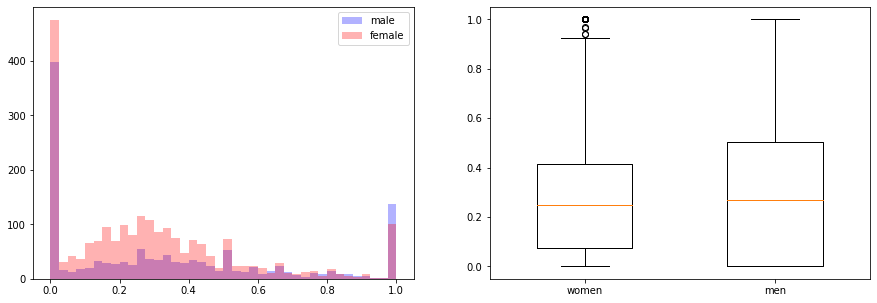

구매주기


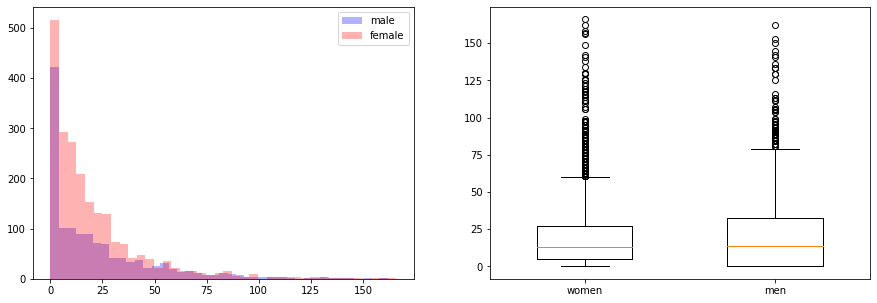

In [19]:
for v in numerical_feats:
    df = t[[v,'gender']]
    
    male = df[df.gender==1]
    female = df[df.gender==0]
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    
    print(v)
    axes[0].hist(male[v],alpha=0.3,color='blue',label='male',bins=40)
    axes[0].hist(female[v],alpha=0.3,color='red',label='female',bins=40)
    axes[0].legend()
    axes[1].boxplot(female[v],positions=[0],widths=0.5)
    axes[1].boxplot(male[v],positions=[1],widths=0.5)
    axes[1].set_xticklabels(['women','men'])
    plt.show()

## Scale / get-dummy / smote / RF Modeling / GSCV

In [27]:
x = train.drop(['cust_id','gender'],axis=1)
y = train.gender

In [28]:
x_dum = pd.get_dummies(x)
test_dum = pd.get_dummies(test)

missing_cols = set( x_dum.columns ) - set( test_dum.columns )
for c in missing_cols:
    test_dum[c] = 0
test_dum = test_dum[x_dum.columns]


In [29]:
scaler = StandardScaler()
x_dum = scaler.fit_transform(x_dum)
test_dum = scaler.transform(test_dum)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_dum, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
smote = SMOTE(random_state=42)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train_over, y_train_over)

y_pred = rf.predict(X_test)
report =classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])
print(report)

              precision    recall  f1-score   support

     class 0       0.73      0.49      0.59       437
     class 1       0.46      0.70      0.55       263

    accuracy                           0.57       700
   macro avg       0.60      0.60      0.57       700
weighted avg       0.63      0.57      0.58       700



In [33]:
lr_probs = rf.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs[:,1])
lr_auc

0.64508270179499

In [40]:
skfold = StratifiedKFold(n_splits=10)

RF = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRF = GridSearchCV(RF, param_grid = rf_param_grid, cv=skfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRF.fit(x_dum,y)
RF_best = gsRF.best_estimator_

gsRF.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  6.8min finished


0.6602857142857143

In [41]:
test_gender = pd.Series(gsRF.predict_proba(test_dum)[:,1], name="gender")
results= pd.concat([test.cust_id,test_gender],axis=1)
results.head(3)

,cust_id,gender
0,3500,0.424880
1,3501,0.183917
2,3502,0.152166


In [ ]:
results.to_csv("submission.csv",index=False)